## Installing Needed Dependencies:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.getcwd()

'C:\\Users\\v-paszaf\\Desktop'

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

## Feature engineering:

In [5]:
df.sample(5)

RowNumber  CustomerId Surname  CreditScore Geography  Gender  Age  \
1524       1525    15653595   Ts'ai          796    France    Male   51   
6945       6946    15747821      K?          554   Germany  Female   31   
3024       3025    15610801     Pan          648   Germany    Male   41   
8956       8957    15723481  Wright          728     Spain    Male   42   
1090       1091    15604304   Perry          539   Germany  Female   34   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1524       6       0.00              2          0               1   
6945       6  135470.90              1          1               0   
3024       5  123049.21              1          0               1   
8956       8       0.00              2          0               1   
1090       4   91622.42              1          1               1   

      EstimatedSalary  Exited  
1524        194733.28       0  
6945        107074.81       0  
3024          5066.76       0  
8956         41823.22       0  
1090        136603.42       0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df_geo = pd.get_dummies(df['Geography'])

In [11]:
df = pd.concat([df,df_geo], axis=1)

In [12]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  France  Germany  Spain  
0        101348.88       1       1        0      0  
1        112542.58       0       0        0      1  
2        113931.57       1       1        0      0  
3         93826.63       0       1        0      0  
4         79084.10       0       0        0      1

In [13]:
df.drop(['Geography'], axis = 1, inplace=True)

In [14]:
df.head()

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619  Female   42       2   
1          2    15647311      Hill          608  Female   41       1   
2          3    15619304      Onio          502  Female   42       8   
3          4    15701354      Boni          699  Female   39       1   
4          5    15737888  Mitchell          850  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  France  Germany  Spain  
0       1       1        0      0  
1       0       0        0      1  
2       1       1        0      0  
3       0       1        0      0  
4       0       0        0      1

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
df['Gender'] = le.fit_transform(df['Gender'])

In [18]:
df.sample(5)

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
6543       6544    15796218       Wei          814       1   29       1   
8607       8608    15643215       Jen          602       1   38       2   
4887       4888    15614213  Muramats          620       1   37       0   
9054       9055    15617476   Manfrin          546       0   30       5   
5370       5371    15728564        Lo          682       1   41       6   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
6543  131968.57              2          1               1        147693.92   
8607   71667.97              2          0               0        137111.89   
4887  107548.94              1          1               0         71175.94   
9054       0.00              2          0               1        198543.09   
5370       0.00              2          0               1        134158.09   

      Exited  France  Germany  Spain  
6543       0       0        1      0  
8607       0       0        1      0  
4887       0       1        0      0  
9054       0       1        0      0  
5370       1       1        0      0

In [19]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1, inplace=True)

In [20]:
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

In [21]:
X = df.drop(['Exited'], axis = 1).values
y = df['Exited'].values

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc =StandardScaler()

In [24]:
X = sc.fit_transform(X)

## Model Evaluation with Cross Validation:

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [134]:
def models():
    return [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Extra Trees', ExtraTreesClassifier()),
        ('XGboost', GradientBoostingClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('SVC', SVC()),
        ('AdaBoost', AdaBoostClassifier()),
        ('KNN', KNeighborsClassifier())
    ]

In [135]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2)
    mean_test = np.round( np.mean(result['test_score']), 2)
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

Logistic Regression


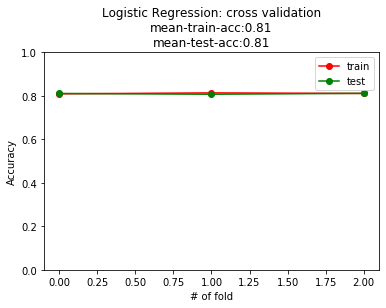

Decision Tree


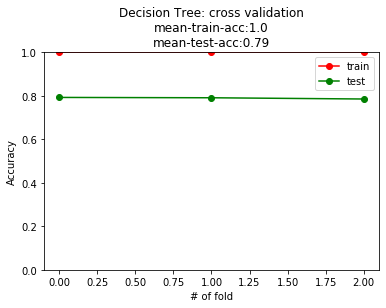

Random Forest


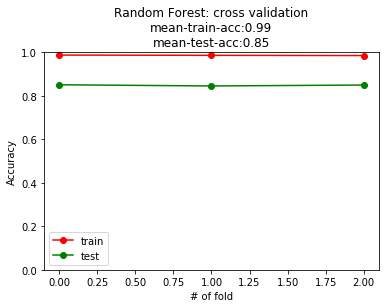

Extra Trees


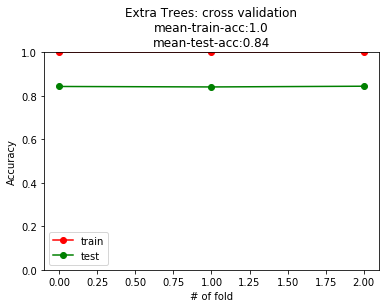

XGboost


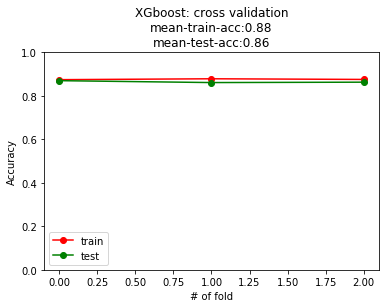

Naive Bayes


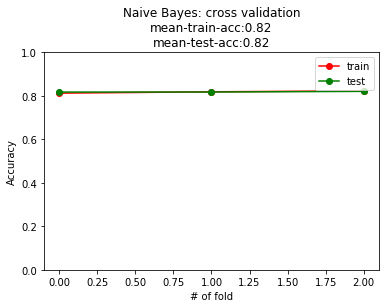

SVC


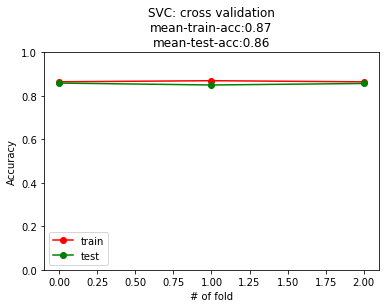

AdaBoost


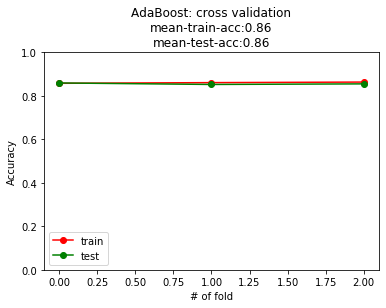

KNN


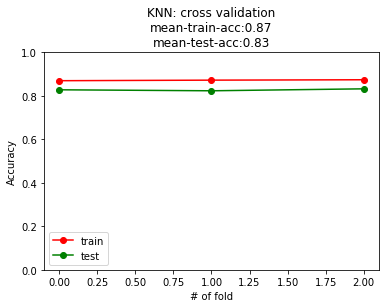

In [136]:
for model_name, model in models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=3, return_estimator=True, return_train_score= True)
    print(model_name)

    plot_result(model_name, result)

In [148]:
a = []
for i in result(test_score):
    a.append(i)

NameError: name 'test_score' is not defined

In [146]:
a

['fit_time', 'score_time', 'estimator', 'test_score', 'train_score']

## Grid Search

In [71]:
from sklearn.model_selection import GridSearchCV

In [152]:
                                  #Logistic Regression

In [137]:
param_log={
           "C":np.logspace(-3,3,7),
           "penalty":["l1","l2"]
           }

In [73]:
logreg=LogisticRegression()
logreg_grid=GridSearchCV(logreg,param_log,cv=10)
logreg_grid.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_grid.best_params_)
print("accuracy :",logreg_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.8094029850746268


In [103]:
# logreg_grid.fit(X_train,y_train)
# print("score",logreg_grid.score(X_test,y_test))

score 0.813939393939394


C:\Users\v-paszaf\AppData\Local\Continuum\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
scores_log = cross_validate(logreg_grid, X_train, y_train, cv=3)

In [75]:
cross_validate(logreg_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

{'fit_time': array([2.54917979, 2.69379568, 2.75662804]),
 'score_time': array([0.00099635, 0.        , 0.00099778]),
 'estimator': (GridSearchCV(cv=10, error_score='raise-deprecating',
               estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                            fit_intercept=True,
                                            intercept_scaling=1, l1_ratio=None,
                                            max_iter=100, multi_class='warn',
                                            n_jobs=None, penalty='l2',
                                            random_state=None, solver='warn',
                                            tol=0.0001, verbose=0,
                                            warm_start=False),
               iid='warn', n_jobs=None,
               param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                           'penalty': ['l1', 'l2']},
               pre_dispatch='2*n_jobs', r

In [76]:
print('scores for cross validation of Logistic Regression after grid search:')
print('cross validation test score:',scores_log['test_score']), 
print('test score mean:', np.round(scores_log['test_score'].mean(), 4),'±', np.round(scores_log['test_score'].std(), 4))

scores for cross validation of Logistic Regression after grid search:
cross validation test score: [0.79991047 0.81244405 0.81675627]
test score mean: 0.8097 ± 0.0071


In [ ]:
                                   #Decision Tree

In [34]:
param_DT = {
            'min_samples_split' : range(10,500,20),
            'max_depth': range(1,20,2)
            }


In [ ]:
DT_grid=GridSearchCV(DecisionTreeClassifier(), param_DT)
DT_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",DT_grid.best_params_)
print("accuracy :", DT_grid.best_score_)

In [ ]:
scores_DT= cross_validate(DT_grid, X_train, y_train, cv=3)

In [45]:
cross_validate(DT_grid, X_train, y_train, scoring='roc-auc', cv=3, return_estimator=True, return_train_score= True)


{'fit_time': array([7.31391644, 7.527174  , 8.40647244]),
 'score_time': array([0.00099826, 0.00199485, 0.00099707]),
 'estimator': (GridSearchCV(cv='warn', error_score='raise-deprecating',
               estimator=DecisionTreeClassifier(class_weight=None,
                                                criterion='gini', max_depth=None,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort=False, random_state=None,
                                                splitter='best'),
              

In [39]:
print('scores for cross validation of Decision Tree after grid search:')
print('cross validation test score:',scores_DT['test_score']), 
print('test score mean:', np.round(scores_DT['test_score'].mean(), 4),'±', np.round(scores_DT['test_score'].std(), 4))

scores for cross validation of Decision Tree after grid search:
cross validation test score: [0.84959714 0.85094002 0.83691756]
test score mean: 0.8458 ± 0.0063


In [ ]:
                              #Random Forest

In [48]:
param_RF = {
               'n_estimators': np.arange(1, 200, 10),
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.arange(2, 10),
               'min_samples_split': np.arange(2, 20, 2),
               'min_samples_leaf': np.arange(1,5),
               'bootstrap': [True, False]
            }

In [ ]:
RF_grid=GridSearchCV(RandomForestClassifier(), param_RF)
RF_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",RF_grid.best_params_)
print("accuracy :", RF_grid.best_score_)

In [ ]:
scores_RF= cross_validate(RF_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(RF_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)


In [ ]:
print('scores for cross validation of Random Forest after grid search:')
print('cross validation test score:',scores['test_score']), 
print('test score mean:', np.round(scores_RF['test_score'].mean(), 4),'±', np.round(scores_RF['test_score'].std(), 4))

In [151]:
                                #Extreme Trees

In [ ]:
param_ET = {
            'n_estimators': np.arange(1, 200, 10),
            'max_features': ['auto', 'sqrt'],
            'max_depth': np.arange(2, 10),
            'min_samples_split': np.arange(2, 20, 2),
            'min_samples_leaf': np.arange(1,5),
            'bootstrap': [True, False]
           }

In [ ]:
ET_grid=GridSearchCV(ExtraTreesClassifier(), param_ET)
ET_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",ET_grid.best_params_)
print("accuracy :", ET_grid.best_score_)

In [ ]:
scores_ET= cross_validate(ET_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(ET_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of Extreme Tress after grid search:')
print('cross validation test score:',scores_ET['test_score']), 
print('test score mean:', np.round(scores_ET['test_score'].mean(), 4),'±', np.round(scores_ET['test_score'].std(), 4))

In [ ]:
                                     #XG Boost

In [ ]:
param_XG ={
          'loss': ['deviance', 'exponential'],
          'learning_rate'= np.arange(0.1, 1),
          'n_estimators': np.arange(1, 200, 10),
          'max_features': ['auto', 'sqrt'],
          'max_depth': np.arange(2, 10),
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,5),
          }

In [ ]:
XG_grid=GridSearchCV(GradientBoostingClassifier(), param_XG)
XG_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",XG_grid.best_params_)
print("accuracy :", XG_grid.best_score_)

In [ ]:
scores_XG= cross_validate(XG_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(XG_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of XG Boost after grid search:')
print('cross validation test score:',scores_XG['test_score']), 
print('test score mean:', np.round(scores_XG['test_score'].mean(), 4),'±', np.round(scores_XG['test_score'].std(), 4))

In [150]:
                                #Support Vector Machine

In [138]:
param_SVM ={
            'C': [0.1,1, 10, 100, 1000],
            'gamma': [1,0.1,0.01,0.001,0.0001],
            'kernel': ['rbf', 'poli', 'linear']
            } 

In [ ]:
SVM_grid=GridSearchCV(SVC(), param_SVM)
XG_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",SVM_grid.best_params_)
print("accuracy :", SVM_grid.best_score_)

In [ ]:
scores_SVM= cross_validate(SVM_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(SVM_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of SVM after grid search:')
print('cross validation test score:',scores_SVM['test_score']), 
print('test score mean:', np.round(scores_SVM['test_score'].mean(), 4),'±', np.round(scores_SVM['test_score'].std(), 4))

In [149]:
                                  # Ada Boost

In [ ]:
param_AB = {
            'n_estimators': np.arange(1, 100, 10),
            'learning_rate': np.arange(0.1, 1),
            'algorithm': ['SAMME', 'SAMME.R']
            }

In [ ]:
AB_grid=GridSearchCV(AdaBoostClassifier(), param_AB)
AB_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",AB_grid.best_params_)
print("accuracy :", AB_grid.best_score_)

In [ ]:
scores_AB= cross_validate(AB_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(AB_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of Ada Boost after grid search:')
print('cross validation test score:',scores_AB['test_score']), 
print('test score mean:', np.round(scores_AB['test_score'].mean(), 4),'±', np.round(scores_AB['test_score'].std(), 4))

In [153]:
                           #Nearest Neighbour

In [ ]:
param_NN = {
            'n_neighbors': np.arange(1,20),
            'radius': np.arange(1.0, 10.0, 1.0),
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': np.arange(10,100,10) 
            }

In [ ]:
NN_grid=GridSearchCV(KNeighborsClassifier(), param_NN)
NN_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",NN_grid.best_params_)
print("accuracy :", NN_grid.best_score_)

In [ ]:
scores_NN= cross_validate(NN_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(NN_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print('scores for cross validation of Nearest Neighbour after grid search:')
print('cross validation test score:',scores_NN['test_score']), 
print('test score mean:', np.round(scores_NN['test_score'].mean(), 4),'±', np.round(scores_NN['test_score'].std(), 4))

#### Elbow Method for KNN algorithm to check if generate better result than grid search

In [ ]:
KN =KNeighborsClassifier()

In [ ]:
KN.fit(X_train, y_train)

In [ ]:
pred_KN = KN.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred_KN))
print('\n')
print(confusion_matrix(y_test, pred_KN))

In [ ]:
error_rate = []

for i in range(1,50):
    
    KN = KNeighborsClassifier(n_neighbors=i)
    KN.fit(X_train,y_train)
    pred_i = KN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
KN =KNeighborsClassifier(n_neighbors = 17)

In [ ]:
KN.fit(X_train,y_train)

In [ ]:
pred_KN = KN.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,pred_KN))
print('\n')
print(confusion_matrix(y_test, pred_KN))

In [ ]:
cross_validate(KN, X_train, y_train, cv =3)

## ##############################################

In [116]:
from sklearn.cluster import KMeans

In [117]:
KM = KMeans()

In [118]:
KM.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
KM_pred = KM.predict((y_test).reshape(-1, 12))

In [ ]:
print(classification_report(y_test, KM_pred))
print('\n')
print(confusion_matrix(y_test, KM_pred))

## #######################

## Neural Networks

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

Using TensorFlow backend.


In [29]:
def keras_model():
  model = Sequential()
  model.add(Dense(32, input_shape= (X.shape[1],), activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy']),
  keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
  result = model.evaluate(X_test, y_test)
  return model

In [30]:
model = KerasClassifier(
                        build_fn=keras_model,
                        epochs=1000, verbose=2,
                      )

In [32]:
model.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
3300/3300 [==============================] - 0s 110us/step
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 2s - loss: 0.4593 - acc: 0.7967
Epoch 2/1000
 - 0s - loss: 0.4376 - acc: 0.8066
Epoch 3/1000
 - 0s - loss: 0.4313 - acc: 0.8157
Epoch 4/1000
 - 0s - loss: 0.4201 - acc: 0.8227
Epoch 5/1000
 - 0s - loss: 0.4012 - acc: 0.8333
Epoch 6/1000
 - 0s - loss: 0.3876 - acc: 0.8381
Epoch 7/1000
 - 0s - loss: 0.3765 - acc: 0.8449
Epoch 8/1000
 - 0s - loss: 0.3694 - acc: 0.8484
Epoch 9/1000
 - 0s - loss: 0.3662 - acc: 0.8436
Epoch 10/1000
 - 0s - loss: 0.3648 - acc: 0.8493
Epoch 11/1000
 - 0s - loss: 0.3624 - acc: 0.8496
Epoch 12/1000
 - 0s - loss: 0.3571 - acc: 0.8531
Epoch 13/1000
 - 0s - loss: 0.3565 - acc: 0.8548
Epoch 14/1000
 - 0s - loss: 0.3523 - acc: 0.8561
Epoch 15/1000
 - 0s - loss: 0.3541 - acc: 0.8519
Epoch 16/1000
 - 0s - loss: 0.3488 - acc: 0.8551
Epoch 17/1000
 - 0s - loss: 0.3488 - acc: 0.85

Epoch 153/1000
 - 0s - loss: 0.2966 - acc: 0.8748
Epoch 154/1000
 - 0s - loss: 0.2965 - acc: 0.8716
Epoch 155/1000
 - 0s - loss: 0.2956 - acc: 0.8751
Epoch 156/1000
 - 0s - loss: 0.2961 - acc: 0.8767
Epoch 157/1000
 - 0s - loss: 0.2948 - acc: 0.8779
Epoch 158/1000
 - 0s - loss: 0.2936 - acc: 0.8779
Epoch 159/1000
 - 0s - loss: 0.2953 - acc: 0.8740
Epoch 160/1000
 - 0s - loss: 0.2958 - acc: 0.8734
Epoch 161/1000
 - 0s - loss: 0.2936 - acc: 0.8736
Epoch 162/1000
 - 0s - loss: 0.2947 - acc: 0.8769
Epoch 163/1000
 - 0s - loss: 0.2954 - acc: 0.8772
Epoch 164/1000
 - 0s - loss: 0.2931 - acc: 0.8743
Epoch 165/1000
 - 0s - loss: 0.2941 - acc: 0.8743
Epoch 166/1000
 - 0s - loss: 0.2935 - acc: 0.8751
Epoch 167/1000
 - 0s - loss: 0.2933 - acc: 0.8773
Epoch 168/1000
 - 0s - loss: 0.2936 - acc: 0.8763
Epoch 169/1000
 - 0s - loss: 0.2933 - acc: 0.8778
Epoch 170/1000
 - 0s - loss: 0.2942 - acc: 0.8740
Epoch 171/1000
 - 0s - loss: 0.2926 - acc: 0.8778
Epoch 172/1000
 - 0s - loss: 0.2937 - acc: 0.8739


Epoch 317/1000
 - 0s - loss: 0.2751 - acc: 0.8852
Epoch 318/1000
 - 0s - loss: 0.2754 - acc: 0.8854
Epoch 319/1000
 - 0s - loss: 0.2752 - acc: 0.8875
Epoch 320/1000
 - 0s - loss: 0.2756 - acc: 0.8842
Epoch 321/1000
 - 0s - loss: 0.2753 - acc: 0.8860
Epoch 322/1000
 - 0s - loss: 0.2742 - acc: 0.8848
Epoch 323/1000
 - 0s - loss: 0.2759 - acc: 0.8831
Epoch 324/1000
 - 0s - loss: 0.2766 - acc: 0.8840
Epoch 325/1000
 - 0s - loss: 0.2759 - acc: 0.8843
Epoch 326/1000
 - 0s - loss: 0.2747 - acc: 0.8858
Epoch 327/1000
 - 0s - loss: 0.2758 - acc: 0.8848
Epoch 328/1000
 - 0s - loss: 0.2748 - acc: 0.8848
Epoch 329/1000
 - 0s - loss: 0.2748 - acc: 0.8870
Epoch 330/1000
 - 0s - loss: 0.2740 - acc: 0.8878
Epoch 331/1000
 - 0s - loss: 0.2759 - acc: 0.8854
Epoch 332/1000
 - 0s - loss: 0.2746 - acc: 0.8861
Epoch 333/1000
 - 0s - loss: 0.2756 - acc: 0.8855
Epoch 334/1000
 - 0s - loss: 0.2749 - acc: 0.8870
Epoch 335/1000
 - 0s - loss: 0.2743 - acc: 0.8846
Epoch 336/1000
 - 0s - loss: 0.2750 - acc: 0.8846


Epoch 481/1000
 - 0s - loss: 0.2672 - acc: 0.8894
Epoch 482/1000
 - 0s - loss: 0.2674 - acc: 0.8904
Epoch 483/1000
 - 0s - loss: 0.2689 - acc: 0.8888
Epoch 484/1000
 - 0s - loss: 0.2688 - acc: 0.8863
Epoch 485/1000
 - 0s - loss: 0.2684 - acc: 0.8882
Epoch 486/1000
 - 0s - loss: 0.2675 - acc: 0.8884
Epoch 487/1000
 - 0s - loss: 0.2668 - acc: 0.8882
Epoch 488/1000
 - 0s - loss: 0.2691 - acc: 0.8884
Epoch 489/1000
 - 0s - loss: 0.2670 - acc: 0.8891
Epoch 490/1000
 - 0s - loss: 0.2672 - acc: 0.8879
Epoch 491/1000
 - 0s - loss: 0.2672 - acc: 0.8857
Epoch 492/1000
 - 0s - loss: 0.2677 - acc: 0.8864
Epoch 493/1000
 - 0s - loss: 0.2685 - acc: 0.8885
Epoch 494/1000
 - 0s - loss: 0.2671 - acc: 0.8900
Epoch 495/1000
 - 1s - loss: 0.2673 - acc: 0.8894
Epoch 496/1000
 - 0s - loss: 0.2674 - acc: 0.8893
Epoch 497/1000
 - 0s - loss: 0.2676 - acc: 0.8899
Epoch 498/1000
 - 0s - loss: 0.2676 - acc: 0.8882
Epoch 499/1000
 - 0s - loss: 0.2677 - acc: 0.8875
Epoch 500/1000
 - 0s - loss: 0.2672 - acc: 0.8891


Epoch 645/1000
 - 0s - loss: 0.2635 - acc: 0.8916
Epoch 646/1000
 - 0s - loss: 0.2632 - acc: 0.8927
Epoch 647/1000
 - 0s - loss: 0.2646 - acc: 0.8904
Epoch 648/1000
 - 0s - loss: 0.2641 - acc: 0.8922
Epoch 649/1000
 - 0s - loss: 0.2618 - acc: 0.8951
Epoch 650/1000
 - 0s - loss: 0.2624 - acc: 0.8931
Epoch 651/1000
 - 0s - loss: 0.2639 - acc: 0.8933
Epoch 652/1000
 - 0s - loss: 0.2632 - acc: 0.8912
Epoch 653/1000
 - 0s - loss: 0.2633 - acc: 0.8907
Epoch 654/1000
 - 0s - loss: 0.2643 - acc: 0.8928
Epoch 655/1000
 - 0s - loss: 0.2638 - acc: 0.8876
Epoch 656/1000
 - 0s - loss: 0.2632 - acc: 0.8909
Epoch 657/1000
 - 0s - loss: 0.2635 - acc: 0.8913
Epoch 658/1000
 - 0s - loss: 0.2633 - acc: 0.8906
Epoch 659/1000
 - 0s - loss: 0.2642 - acc: 0.8909
Epoch 660/1000
 - 0s - loss: 0.2639 - acc: 0.8915
Epoch 661/1000
 - 0s - loss: 0.2629 - acc: 0.8942
Epoch 662/1000
 - 0s - loss: 0.2638 - acc: 0.8910
Epoch 663/1000
 - 0s - loss: 0.2631 - acc: 0.8899
Epoch 664/1000
 - 0s - loss: 0.2623 - acc: 0.8909


Epoch 809/1000
 - 0s - loss: 0.2618 - acc: 0.8934
Epoch 810/1000
 - 0s - loss: 0.2603 - acc: 0.8893
Epoch 811/1000
 - 0s - loss: 0.2600 - acc: 0.8922
Epoch 812/1000
 - 0s - loss: 0.2611 - acc: 0.8921
Epoch 813/1000
 - 0s - loss: 0.2612 - acc: 0.8916
Epoch 814/1000
 - 0s - loss: 0.2609 - acc: 0.8907
Epoch 815/1000
 - 0s - loss: 0.2614 - acc: 0.8909
Epoch 816/1000
 - 0s - loss: 0.2613 - acc: 0.8937
Epoch 817/1000
 - 0s - loss: 0.2607 - acc: 0.8933
Epoch 818/1000
 - 0s - loss: 0.2598 - acc: 0.8921
Epoch 819/1000
 - 0s - loss: 0.2591 - acc: 0.8931
Epoch 820/1000
 - 0s - loss: 0.2605 - acc: 0.8933
Epoch 821/1000
 - 0s - loss: 0.2602 - acc: 0.8936
Epoch 822/1000
 - 0s - loss: 0.2614 - acc: 0.8925
Epoch 823/1000
 - 0s - loss: 0.2601 - acc: 0.8918
Epoch 824/1000
 - 0s - loss: 0.2591 - acc: 0.8915
Epoch 825/1000
 - 0s - loss: 0.2600 - acc: 0.8909
Epoch 826/1000
 - 0s - loss: 0.2601 - acc: 0.8907
Epoch 827/1000
 - 0s - loss: 0.2604 - acc: 0.8924
Epoch 828/1000
 - 0s - loss: 0.2598 - acc: 0.8913


Epoch 973/1000
 - 0s - loss: 0.2590 - acc: 0.8952
Epoch 974/1000
 - 0s - loss: 0.2582 - acc: 0.8939
Epoch 975/1000
 - 0s - loss: 0.2588 - acc: 0.8933
Epoch 976/1000
 - 0s - loss: 0.2575 - acc: 0.8940
Epoch 977/1000
 - 0s - loss: 0.2582 - acc: 0.8921
Epoch 978/1000
 - 0s - loss: 0.2567 - acc: 0.8936
Epoch 979/1000
 - 0s - loss: 0.2585 - acc: 0.8930
Epoch 980/1000
 - 0s - loss: 0.2576 - acc: 0.8949
Epoch 981/1000
 - 0s - loss: 0.2581 - acc: 0.8958
Epoch 982/1000
 - 0s - loss: 0.2580 - acc: 0.8936
Epoch 983/1000
 - 0s - loss: 0.2587 - acc: 0.8952
Epoch 984/1000
 - 0s - loss: 0.2590 - acc: 0.8912
Epoch 985/1000
 - 0s - loss: 0.2579 - acc: 0.8940
Epoch 986/1000
 - 0s - loss: 0.2579 - acc: 0.8915
Epoch 987/1000
 - 0s - loss: 0.2585 - acc: 0.8925
Epoch 988/1000
 - 0s - loss: 0.2587 - acc: 0.8945
Epoch 989/1000
 - 0s - loss: 0.2581 - acc: 0.8945
Epoch 990/1000
 - 0s - loss: 0.2588 - acc: 0.8937
Epoch 991/1000
 - 0s - loss: 0.2581 - acc: 0.8946
Epoch 992/1000
 - 0s - loss: 0.2587 - acc: 0.8919


In [64]:
result = model.score(X_test, y_test)
print("Accuracy: %.2f" % (result*100.0))

Accuracy: 84.21


In [69]:
scores_ANN= cross_validate(model, X_train, y_train, cv=3)

3300/3300 [==============================] - 0s 111us/step
Epoch 1/1000
 - 1s - loss: 0.4514 - acc: 0.8047
Epoch 2/1000
 - 0s - loss: 0.4254 - acc: 0.8119
Epoch 3/1000
 - 0s - loss: 0.4266 - acc: 0.8162
Epoch 4/1000
 - 0s - loss: 0.4191 - acc: 0.8240
Epoch 5/1000
 - 0s - loss: 0.4127 - acc: 0.8256
Epoch 6/1000
 - 0s - loss: 0.4065 - acc: 0.8354
Epoch 7/1000
 - 0s - loss: 0.3944 - acc: 0.8390
Epoch 8/1000
 - 0s - loss: 0.3859 - acc: 0.8439
Epoch 9/1000
 - 0s - loss: 0.3779 - acc: 0.8426
Epoch 10/1000
 - 0s - loss: 0.3683 - acc: 0.8471
Epoch 11/1000
 - 0s - loss: 0.3605 - acc: 0.8536
Epoch 12/1000
 - 0s - loss: 0.3592 - acc: 0.8482
Epoch 13/1000
 - 0s - loss: 0.3556 - acc: 0.8542
Epoch 14/1000
 - 0s - loss: 0.3529 - acc: 0.8551
Epoch 15/1000
 - 0s - loss: 0.3492 - acc: 0.8587
Epoch 16/1000
 - 0s - loss: 0.3488 - acc: 0.8574
Epoch 17/1000
 - 0s - loss: 0.3453 - acc: 0.8551
Epoch 18/1000
 - 0s - loss: 0.3421 - acc: 0.8614
Epoch 19/1000
 - 0s - loss: 0.3417 - acc: 0.8594
Epoch 20/1000
 - 0s

Epoch 166/1000
 - 0s - loss: 0.2735 - acc: 0.8887
Epoch 167/1000
 - 0s - loss: 0.2713 - acc: 0.8847
Epoch 168/1000
 - 0s - loss: 0.2702 - acc: 0.8829
Epoch 169/1000
 - 0s - loss: 0.2691 - acc: 0.8858
Epoch 170/1000
 - 0s - loss: 0.2722 - acc: 0.8856
Epoch 171/1000
 - 0s - loss: 0.2706 - acc: 0.8885
Epoch 172/1000
 - 0s - loss: 0.2707 - acc: 0.8914
Epoch 173/1000
 - 0s - loss: 0.2714 - acc: 0.8851
Epoch 174/1000
 - 0s - loss: 0.2707 - acc: 0.8856
Epoch 175/1000
 - 0s - loss: 0.2688 - acc: 0.8869
Epoch 176/1000
 - 0s - loss: 0.2691 - acc: 0.8865
Epoch 177/1000
 - 0s - loss: 0.2699 - acc: 0.8874
Epoch 178/1000
 - 0s - loss: 0.2698 - acc: 0.8878
Epoch 179/1000
 - 0s - loss: 0.2692 - acc: 0.8869
Epoch 180/1000
 - 0s - loss: 0.2686 - acc: 0.8854
Epoch 181/1000
 - 0s - loss: 0.2687 - acc: 0.8880
Epoch 182/1000
 - 0s - loss: 0.2702 - acc: 0.8856
Epoch 183/1000
 - 0s - loss: 0.2683 - acc: 0.8883
Epoch 184/1000
 - 0s - loss: 0.2660 - acc: 0.8889
Epoch 185/1000
 - 0s - loss: 0.2673 - acc: 0.8880


Epoch 330/1000
 - 0s - loss: 0.2418 - acc: 0.9013
Epoch 331/1000
 - 0s - loss: 0.2424 - acc: 0.8992
Epoch 332/1000
 - 0s - loss: 0.2431 - acc: 0.9006
Epoch 333/1000
 - 0s - loss: 0.2406 - acc: 0.9037
Epoch 334/1000
 - 0s - loss: 0.2420 - acc: 0.9024
Epoch 335/1000
 - 0s - loss: 0.2415 - acc: 0.9008
Epoch 336/1000
 - 0s - loss: 0.2416 - acc: 0.8988
Epoch 337/1000
 - 0s - loss: 0.2408 - acc: 0.9026
Epoch 338/1000
 - 0s - loss: 0.2406 - acc: 0.8992
Epoch 339/1000
 - 0s - loss: 0.2419 - acc: 0.9008
Epoch 340/1000
 - 0s - loss: 0.2420 - acc: 0.9008
Epoch 341/1000
 - 0s - loss: 0.2425 - acc: 0.9001
Epoch 342/1000
 - 0s - loss: 0.2409 - acc: 0.8986
Epoch 343/1000
 - 0s - loss: 0.2412 - acc: 0.9008
Epoch 344/1000
 - 0s - loss: 0.2408 - acc: 0.8990
Epoch 345/1000
 - 0s - loss: 0.2418 - acc: 0.8977
Epoch 346/1000
 - 0s - loss: 0.2420 - acc: 0.9019
Epoch 347/1000
 - 0s - loss: 0.2406 - acc: 0.9015
Epoch 348/1000
 - 0s - loss: 0.2403 - acc: 0.8988
Epoch 349/1000
 - 0s - loss: 0.2410 - acc: 0.9021


Epoch 494/1000
 - 0s - loss: 0.2283 - acc: 0.9057
Epoch 495/1000
 - 0s - loss: 0.2304 - acc: 0.9046
Epoch 496/1000
 - 0s - loss: 0.2288 - acc: 0.9077
Epoch 497/1000
 - 0s - loss: 0.2293 - acc: 0.9084
Epoch 498/1000
 - 0s - loss: 0.2288 - acc: 0.9073
Epoch 499/1000
 - 0s - loss: 0.2275 - acc: 0.9057
Epoch 500/1000
 - 0s - loss: 0.2280 - acc: 0.9064
Epoch 501/1000
 - 0s - loss: 0.2278 - acc: 0.9042
Epoch 502/1000
 - 0s - loss: 0.2285 - acc: 0.9095
Epoch 503/1000
 - 0s - loss: 0.2276 - acc: 0.9073
Epoch 504/1000
 - 0s - loss: 0.2263 - acc: 0.9098
Epoch 505/1000
 - 0s - loss: 0.2286 - acc: 0.9086
Epoch 506/1000
 - 0s - loss: 0.2276 - acc: 0.9091
Epoch 507/1000
 - 0s - loss: 0.2267 - acc: 0.9062
Epoch 508/1000
 - 0s - loss: 0.2283 - acc: 0.9077
Epoch 509/1000
 - 0s - loss: 0.2273 - acc: 0.9100
Epoch 510/1000
 - 0s - loss: 0.2282 - acc: 0.9035
Epoch 511/1000
 - 0s - loss: 0.2285 - acc: 0.9062
Epoch 512/1000
 - 0s - loss: 0.2273 - acc: 0.9116
Epoch 513/1000
 - 0s - loss: 0.2265 - acc: 0.9098


Epoch 658/1000
 - 0s - loss: 0.2204 - acc: 0.9098
Epoch 659/1000
 - 0s - loss: 0.2177 - acc: 0.9111
Epoch 660/1000
 - 0s - loss: 0.2195 - acc: 0.9111
Epoch 661/1000
 - 0s - loss: 0.2211 - acc: 0.9113
Epoch 662/1000
 - 0s - loss: 0.2190 - acc: 0.9122
Epoch 663/1000
 - 0s - loss: 0.2190 - acc: 0.9113
Epoch 664/1000
 - 0s - loss: 0.2202 - acc: 0.9080
Epoch 665/1000
 - 0s - loss: 0.2190 - acc: 0.9107
Epoch 666/1000
 - 0s - loss: 0.2197 - acc: 0.9100
Epoch 667/1000
 - 0s - loss: 0.2187 - acc: 0.9107
Epoch 668/1000
 - 0s - loss: 0.2193 - acc: 0.9120
Epoch 669/1000
 - 0s - loss: 0.2184 - acc: 0.9124
Epoch 670/1000
 - 0s - loss: 0.2188 - acc: 0.9142
Epoch 671/1000
 - 0s - loss: 0.2188 - acc: 0.9131
Epoch 672/1000
 - 0s - loss: 0.2199 - acc: 0.9109
Epoch 673/1000
 - 0s - loss: 0.2186 - acc: 0.9138
Epoch 674/1000
 - 0s - loss: 0.2190 - acc: 0.9140
Epoch 675/1000
 - 0s - loss: 0.2196 - acc: 0.9116
Epoch 676/1000
 - 0s - loss: 0.2190 - acc: 0.9136
Epoch 677/1000
 - 0s - loss: 0.2189 - acc: 0.9147


Epoch 822/1000
 - 0s - loss: 0.2130 - acc: 0.9172
Epoch 823/1000
 - 0s - loss: 0.2141 - acc: 0.9140
Epoch 824/1000
 - 0s - loss: 0.2145 - acc: 0.9136
Epoch 825/1000
 - 0s - loss: 0.2145 - acc: 0.9151
Epoch 826/1000
 - 0s - loss: 0.2134 - acc: 0.9156
Epoch 827/1000
 - 0s - loss: 0.2127 - acc: 0.9156
Epoch 828/1000
 - 0s - loss: 0.2127 - acc: 0.9165
Epoch 829/1000
 - 0s - loss: 0.2136 - acc: 0.9133
Epoch 830/1000
 - 0s - loss: 0.2136 - acc: 0.9169
Epoch 831/1000
 - 0s - loss: 0.2134 - acc: 0.9167
Epoch 832/1000
 - 0s - loss: 0.2134 - acc: 0.9172
Epoch 833/1000
 - 0s - loss: 0.2145 - acc: 0.9138
Epoch 834/1000
 - 0s - loss: 0.2132 - acc: 0.9158
Epoch 835/1000
 - 0s - loss: 0.2132 - acc: 0.9167
Epoch 836/1000
 - 0s - loss: 0.2145 - acc: 0.9169
Epoch 837/1000
 - 0s - loss: 0.2138 - acc: 0.9129
Epoch 838/1000
 - 0s - loss: 0.2134 - acc: 0.9147
Epoch 839/1000
 - 0s - loss: 0.2129 - acc: 0.9185
Epoch 840/1000
 - 0s - loss: 0.2129 - acc: 0.9149
Epoch 841/1000
 - 0s - loss: 0.2129 - acc: 0.9124


Epoch 986/1000
 - 0s - loss: 0.2088 - acc: 0.9169
Epoch 987/1000
 - 0s - loss: 0.2087 - acc: 0.9142
Epoch 988/1000
 - 0s - loss: 0.2083 - acc: 0.9169
Epoch 989/1000
 - 0s - loss: 0.2094 - acc: 0.9178
Epoch 990/1000
 - 0s - loss: 0.2091 - acc: 0.9167
Epoch 991/1000
 - 0s - loss: 0.2095 - acc: 0.9140
Epoch 992/1000
 - 0s - loss: 0.2074 - acc: 0.9172
Epoch 993/1000
 - 0s - loss: 0.2087 - acc: 0.9165
Epoch 994/1000
 - 0s - loss: 0.2089 - acc: 0.9149
Epoch 995/1000
 - 0s - loss: 0.2093 - acc: 0.9174
Epoch 996/1000
 - 0s - loss: 0.2091 - acc: 0.9154
Epoch 997/1000
 - 0s - loss: 0.2087 - acc: 0.9145
Epoch 998/1000
 - 0s - loss: 0.2087 - acc: 0.9187
Epoch 999/1000
 - 0s - loss: 0.2093 - acc: 0.9189
Epoch 1000/1000
 - 0s - loss: 0.2095 - acc: 0.9174
3300/3300 [==============================] - 0s 109us/step
Epoch 1/1000
 - 1s - loss: 0.4688 - acc: 0.7898
Epoch 2/1000
 - 0s - loss: 0.4555 - acc: 0.7949
Epoch 3/1000
 - 0s - loss: 0.4523 - acc: 0.7981
Epoch 4/1000
 - 0s - loss: 0.4500 - acc: 0.799

Epoch 151/1000
 - 0s - loss: 0.2976 - acc: 0.8746
Epoch 152/1000
 - 0s - loss: 0.2975 - acc: 0.8708
Epoch 153/1000
 - 0s - loss: 0.2979 - acc: 0.8711
Epoch 154/1000
 - 0s - loss: 0.2979 - acc: 0.8744
Epoch 155/1000
 - 0s - loss: 0.2974 - acc: 0.8751
Epoch 156/1000
 - 0s - loss: 0.2971 - acc: 0.8753
Epoch 157/1000
 - 0s - loss: 0.2961 - acc: 0.8784
Epoch 158/1000
 - 0s - loss: 0.2957 - acc: 0.8728
Epoch 159/1000
 - 0s - loss: 0.2955 - acc: 0.8760
Epoch 160/1000
 - 0s - loss: 0.2968 - acc: 0.8728
Epoch 161/1000
 - 0s - loss: 0.2959 - acc: 0.8751
Epoch 162/1000
 - 0s - loss: 0.2954 - acc: 0.8749
Epoch 163/1000
 - 0s - loss: 0.2956 - acc: 0.8740
Epoch 164/1000
 - 0s - loss: 0.2949 - acc: 0.8749
Epoch 165/1000
 - 0s - loss: 0.2958 - acc: 0.8731
Epoch 166/1000
 - 0s - loss: 0.2943 - acc: 0.8762
Epoch 167/1000
 - 0s - loss: 0.2930 - acc: 0.8726
Epoch 168/1000
 - 0s - loss: 0.2946 - acc: 0.8731
Epoch 169/1000
 - 0s - loss: 0.2940 - acc: 0.8744
Epoch 170/1000
 - 0s - loss: 0.2941 - acc: 0.8749


Epoch 315/1000
 - 0s - loss: 0.2713 - acc: 0.8818
Epoch 316/1000
 - 0s - loss: 0.2718 - acc: 0.8845
Epoch 317/1000
 - 0s - loss: 0.2706 - acc: 0.8901
Epoch 318/1000
 - 0s - loss: 0.2717 - acc: 0.8861
Epoch 319/1000
 - 0s - loss: 0.2705 - acc: 0.8852
Epoch 320/1000
 - 0s - loss: 0.2706 - acc: 0.8854
Epoch 321/1000
 - 0s - loss: 0.2697 - acc: 0.8847
Epoch 322/1000
 - 0s - loss: 0.2713 - acc: 0.8887
Epoch 323/1000
 - 0s - loss: 0.2719 - acc: 0.8834
Epoch 324/1000
 - 0s - loss: 0.2719 - acc: 0.8874
Epoch 325/1000
 - 0s - loss: 0.2694 - acc: 0.8854
Epoch 326/1000
 - 0s - loss: 0.2707 - acc: 0.8861
Epoch 327/1000
 - 0s - loss: 0.2702 - acc: 0.8838
Epoch 328/1000
 - 0s - loss: 0.2718 - acc: 0.8849
Epoch 329/1000
 - 0s - loss: 0.2704 - acc: 0.8892
Epoch 330/1000
 - 0s - loss: 0.2693 - acc: 0.8854
Epoch 331/1000
 - 0s - loss: 0.2702 - acc: 0.8863
Epoch 332/1000
 - 0s - loss: 0.2699 - acc: 0.8894
Epoch 333/1000
 - 0s - loss: 0.2692 - acc: 0.8854
Epoch 334/1000
 - 0s - loss: 0.2702 - acc: 0.8858


Epoch 479/1000
 - 0s - loss: 0.2587 - acc: 0.8874
Epoch 480/1000
 - 0s - loss: 0.2568 - acc: 0.8892
Epoch 481/1000
 - 0s - loss: 0.2562 - acc: 0.8903
Epoch 482/1000
 - 0s - loss: 0.2566 - acc: 0.8872
Epoch 483/1000
 - 0s - loss: 0.2562 - acc: 0.8899
Epoch 484/1000
 - 0s - loss: 0.2568 - acc: 0.8881
Epoch 485/1000
 - 0s - loss: 0.2562 - acc: 0.8845
Epoch 486/1000
 - 0s - loss: 0.2563 - acc: 0.8878
Epoch 487/1000
 - 0s - loss: 0.2571 - acc: 0.8905
Epoch 488/1000
 - 0s - loss: 0.2570 - acc: 0.8869
Epoch 489/1000
 - 0s - loss: 0.2551 - acc: 0.8901
Epoch 490/1000
 - 0s - loss: 0.2576 - acc: 0.8831
Epoch 491/1000
 - 0s - loss: 0.2562 - acc: 0.8912
Epoch 492/1000
 - 0s - loss: 0.2566 - acc: 0.8901
Epoch 493/1000
 - 0s - loss: 0.2562 - acc: 0.8894
Epoch 494/1000
 - 0s - loss: 0.2549 - acc: 0.8923
Epoch 495/1000
 - 0s - loss: 0.2575 - acc: 0.8843
Epoch 496/1000
 - 0s - loss: 0.2567 - acc: 0.8856
Epoch 497/1000
 - 0s - loss: 0.2571 - acc: 0.8890
Epoch 498/1000
 - 0s - loss: 0.2575 - acc: 0.8883


Epoch 643/1000
 - 0s - loss: 0.2495 - acc: 0.8934
Epoch 644/1000
 - 0s - loss: 0.2485 - acc: 0.8977
Epoch 645/1000
 - 0s - loss: 0.2491 - acc: 0.8923
Epoch 646/1000
 - 0s - loss: 0.2487 - acc: 0.8939
Epoch 647/1000
 - 0s - loss: 0.2478 - acc: 0.8966
Epoch 648/1000
 - 0s - loss: 0.2486 - acc: 0.8921
Epoch 649/1000
 - 0s - loss: 0.2480 - acc: 0.8964
Epoch 650/1000
 - 0s - loss: 0.2476 - acc: 0.8970
Epoch 651/1000
 - 0s - loss: 0.2505 - acc: 0.8932
Epoch 652/1000
 - 0s - loss: 0.2470 - acc: 0.8961
Epoch 653/1000
 - 0s - loss: 0.2487 - acc: 0.8928
Epoch 654/1000
 - 0s - loss: 0.2473 - acc: 0.8930
Epoch 655/1000
 - 0s - loss: 0.2486 - acc: 0.8970
Epoch 656/1000
 - 0s - loss: 0.2480 - acc: 0.8914
Epoch 657/1000
 - 0s - loss: 0.2482 - acc: 0.8966
Epoch 658/1000
 - 0s - loss: 0.2475 - acc: 0.8921
Epoch 659/1000
 - 0s - loss: 0.2470 - acc: 0.8948
Epoch 660/1000
 - 0s - loss: 0.2488 - acc: 0.8943
Epoch 661/1000
 - 0s - loss: 0.2483 - acc: 0.8946
Epoch 662/1000
 - 0s - loss: 0.2477 - acc: 0.8914


Epoch 807/1000
 - 0s - loss: 0.2403 - acc: 0.8957
Epoch 808/1000
 - 0s - loss: 0.2410 - acc: 0.9024
Epoch 809/1000
 - 0s - loss: 0.2397 - acc: 0.8997
Epoch 810/1000
 - 0s - loss: 0.2409 - acc: 0.8997
Epoch 811/1000
 - 0s - loss: 0.2413 - acc: 0.8993
Epoch 812/1000
 - 0s - loss: 0.2417 - acc: 0.8970
Epoch 813/1000
 - 0s - loss: 0.2394 - acc: 0.8988
Epoch 814/1000
 - 0s - loss: 0.2404 - acc: 0.8981
Epoch 815/1000
 - 0s - loss: 0.2405 - acc: 0.8972
Epoch 816/1000
 - 0s - loss: 0.2396 - acc: 0.8999
Epoch 817/1000
 - 0s - loss: 0.2420 - acc: 0.8948
Epoch 818/1000
 - 0s - loss: 0.2400 - acc: 0.9004
Epoch 819/1000
 - 0s - loss: 0.2405 - acc: 0.9015
Epoch 820/1000
 - 0s - loss: 0.2409 - acc: 0.8979
Epoch 821/1000
 - 0s - loss: 0.2401 - acc: 0.8997
Epoch 822/1000
 - 0s - loss: 0.2403 - acc: 0.8993
Epoch 823/1000
 - 0s - loss: 0.2405 - acc: 0.8970
Epoch 824/1000
 - 0s - loss: 0.2404 - acc: 0.8977
Epoch 825/1000
 - 0s - loss: 0.2400 - acc: 0.8977
Epoch 826/1000
 - 0s - loss: 0.2403 - acc: 0.8966


Epoch 971/1000
 - 0s - loss: 0.2348 - acc: 0.9006
Epoch 972/1000
 - 0s - loss: 0.2344 - acc: 0.9015
Epoch 973/1000
 - 0s - loss: 0.2342 - acc: 0.8984
Epoch 974/1000
 - 0s - loss: 0.2351 - acc: 0.8986
Epoch 975/1000
 - 0s - loss: 0.2340 - acc: 0.9004
Epoch 976/1000
 - 0s - loss: 0.2355 - acc: 0.8968
Epoch 977/1000
 - 0s - loss: 0.2343 - acc: 0.8995
Epoch 978/1000
 - 0s - loss: 0.2348 - acc: 0.9002
Epoch 979/1000
 - 0s - loss: 0.2349 - acc: 0.8986
Epoch 980/1000
 - 0s - loss: 0.2345 - acc: 0.8981
Epoch 981/1000
 - 0s - loss: 0.2346 - acc: 0.8977
Epoch 982/1000
 - 0s - loss: 0.2353 - acc: 0.8979
Epoch 983/1000
 - 0s - loss: 0.2342 - acc: 0.8979
Epoch 984/1000
 - 0s - loss: 0.2348 - acc: 0.8993
Epoch 985/1000
 - 0s - loss: 0.2335 - acc: 0.9006
Epoch 986/1000
 - 0s - loss: 0.2355 - acc: 0.9022
Epoch 987/1000
 - 0s - loss: 0.2347 - acc: 0.8999
Epoch 988/1000
 - 0s - loss: 0.2360 - acc: 0.8972
Epoch 989/1000
 - 0s - loss: 0.2359 - acc: 0.8981
Epoch 990/1000
 - 0s - loss: 0.2345 - acc: 0.8997


Epoch 136/1000
 - 0s - loss: 0.2831 - acc: 0.8825
Epoch 137/1000
 - 0s - loss: 0.2831 - acc: 0.8811
Epoch 138/1000
 - 0s - loss: 0.2836 - acc: 0.8816
Epoch 139/1000
 - 0s - loss: 0.2831 - acc: 0.8805
Epoch 140/1000
 - 0s - loss: 0.2819 - acc: 0.8849
Epoch 141/1000
 - 0s - loss: 0.2801 - acc: 0.8865
Epoch 142/1000
 - 0s - loss: 0.2826 - acc: 0.8807
Epoch 143/1000
 - 0s - loss: 0.2815 - acc: 0.8836
Epoch 144/1000
 - 0s - loss: 0.2807 - acc: 0.8811
Epoch 145/1000
 - 0s - loss: 0.2786 - acc: 0.8831
Epoch 146/1000
 - 0s - loss: 0.2790 - acc: 0.8845
Epoch 147/1000
 - 0s - loss: 0.2789 - acc: 0.8836
Epoch 148/1000
 - 0s - loss: 0.2784 - acc: 0.8867
Epoch 149/1000
 - 0s - loss: 0.2792 - acc: 0.8822
Epoch 150/1000
 - 0s - loss: 0.2777 - acc: 0.8822
Epoch 151/1000
 - 0s - loss: 0.2787 - acc: 0.8840
Epoch 152/1000
 - 0s - loss: 0.2772 - acc: 0.8827
Epoch 153/1000
 - 0s - loss: 0.2779 - acc: 0.8840
Epoch 154/1000
 - 0s - loss: 0.2784 - acc: 0.8852
Epoch 155/1000
 - 0s - loss: 0.2783 - acc: 0.8840


Epoch 300/1000
 - 0s - loss: 0.2519 - acc: 0.8977
Epoch 301/1000
 - 0s - loss: 0.2515 - acc: 0.8968
Epoch 302/1000
 - 0s - loss: 0.2520 - acc: 0.8948
Epoch 303/1000
 - 0s - loss: 0.2516 - acc: 0.8970
Epoch 304/1000
 - 0s - loss: 0.2504 - acc: 0.8957
Epoch 305/1000
 - 0s - loss: 0.2506 - acc: 0.8968
Epoch 306/1000
 - 0s - loss: 0.2503 - acc: 0.8946
Epoch 307/1000
 - 0s - loss: 0.2518 - acc: 0.8966
Epoch 308/1000
 - 0s - loss: 0.2503 - acc: 0.8977
Epoch 309/1000
 - 0s - loss: 0.2509 - acc: 0.8957
Epoch 310/1000
 - 0s - loss: 0.2512 - acc: 0.8937
Epoch 311/1000
 - 0s - loss: 0.2502 - acc: 0.8939
Epoch 312/1000
 - 0s - loss: 0.2492 - acc: 0.8970
Epoch 313/1000
 - 0s - loss: 0.2486 - acc: 0.8995
Epoch 314/1000
 - 0s - loss: 0.2515 - acc: 0.8975
Epoch 315/1000
 - 0s - loss: 0.2489 - acc: 0.8972
Epoch 316/1000
 - 0s - loss: 0.2492 - acc: 0.8948
Epoch 317/1000
 - 0s - loss: 0.2489 - acc: 0.8999
Epoch 318/1000
 - 0s - loss: 0.2473 - acc: 0.8968
Epoch 319/1000
 - 0s - loss: 0.2494 - acc: 0.8966


Epoch 464/1000
 - 0s - loss: 0.2350 - acc: 0.9022
Epoch 465/1000
 - 0s - loss: 0.2362 - acc: 0.9013
Epoch 466/1000
 - 0s - loss: 0.2352 - acc: 0.9031
Epoch 467/1000
 - 0s - loss: 0.2342 - acc: 0.9006
Epoch 468/1000
 - 0s - loss: 0.2356 - acc: 0.9013
Epoch 469/1000
 - 0s - loss: 0.2348 - acc: 0.9035
Epoch 470/1000
 - 0s - loss: 0.2358 - acc: 0.9028
Epoch 471/1000
 - 0s - loss: 0.2340 - acc: 0.9046
Epoch 472/1000
 - 0s - loss: 0.2365 - acc: 0.9015
Epoch 473/1000
 - 0s - loss: 0.2356 - acc: 0.9049
Epoch 474/1000
 - 0s - loss: 0.2344 - acc: 0.8999
Epoch 475/1000
 - 0s - loss: 0.2353 - acc: 0.9017
Epoch 476/1000
 - 0s - loss: 0.2344 - acc: 0.9017
Epoch 477/1000
 - 0s - loss: 0.2337 - acc: 0.9019
Epoch 478/1000
 - 0s - loss: 0.2340 - acc: 0.9011
Epoch 479/1000
 - 0s - loss: 0.2348 - acc: 0.9033
Epoch 480/1000
 - 0s - loss: 0.2341 - acc: 0.9031
Epoch 481/1000
 - 0s - loss: 0.2344 - acc: 0.9073
Epoch 482/1000
 - 0s - loss: 0.2340 - acc: 0.9073
Epoch 483/1000
 - 0s - loss: 0.2347 - acc: 0.9037


Epoch 628/1000
 - 0s - loss: 0.2260 - acc: 0.9087
Epoch 629/1000
 - 0s - loss: 0.2273 - acc: 0.9078
Epoch 630/1000
 - 0s - loss: 0.2265 - acc: 0.9069
Epoch 631/1000
 - 0s - loss: 0.2263 - acc: 0.9075
Epoch 632/1000
 - 0s - loss: 0.2262 - acc: 0.9089
Epoch 633/1000
 - 0s - loss: 0.2276 - acc: 0.9064
Epoch 634/1000
 - 0s - loss: 0.2262 - acc: 0.9084
Epoch 635/1000
 - 0s - loss: 0.2268 - acc: 0.9075
Epoch 636/1000
 - 0s - loss: 0.2268 - acc: 0.9071
Epoch 637/1000
 - 0s - loss: 0.2261 - acc: 0.9064
Epoch 638/1000
 - 0s - loss: 0.2268 - acc: 0.9073
Epoch 639/1000
 - 0s - loss: 0.2259 - acc: 0.9058
Epoch 640/1000
 - 0s - loss: 0.2257 - acc: 0.9111
Epoch 641/1000
 - 0s - loss: 0.2272 - acc: 0.9069
Epoch 642/1000
 - 0s - loss: 0.2257 - acc: 0.9055
Epoch 643/1000
 - 0s - loss: 0.2248 - acc: 0.9064
Epoch 644/1000
 - 0s - loss: 0.2258 - acc: 0.9069
Epoch 645/1000
 - 0s - loss: 0.2261 - acc: 0.9062
Epoch 646/1000
 - 0s - loss: 0.2252 - acc: 0.9078
Epoch 647/1000
 - 0s - loss: 0.2270 - acc: 0.9093


Epoch 792/1000
 - 0s - loss: 0.2210 - acc: 0.9078
Epoch 793/1000
 - 0s - loss: 0.2213 - acc: 0.9098
Epoch 794/1000
 - 0s - loss: 0.2198 - acc: 0.9116
Epoch 795/1000
 - 0s - loss: 0.2208 - acc: 0.9125
Epoch 796/1000
 - 0s - loss: 0.2220 - acc: 0.9069
Epoch 797/1000
 - 0s - loss: 0.2215 - acc: 0.9105
Epoch 798/1000
 - 0s - loss: 0.2215 - acc: 0.9127
Epoch 799/1000
 - 0s - loss: 0.2216 - acc: 0.9127
Epoch 800/1000
 - 0s - loss: 0.2207 - acc: 0.9098
Epoch 801/1000
 - 0s - loss: 0.2201 - acc: 0.9098
Epoch 802/1000
 - 0s - loss: 0.2213 - acc: 0.9091
Epoch 803/1000
 - 0s - loss: 0.2210 - acc: 0.9091
Epoch 804/1000
 - 0s - loss: 0.2198 - acc: 0.9102
Epoch 805/1000
 - 0s - loss: 0.2203 - acc: 0.9060
Epoch 806/1000
 - 0s - loss: 0.2204 - acc: 0.9109
Epoch 807/1000
 - 0s - loss: 0.2219 - acc: 0.9102
Epoch 808/1000
 - 0s - loss: 0.2200 - acc: 0.9100
Epoch 809/1000
 - 0s - loss: 0.2205 - acc: 0.9089
Epoch 810/1000
 - 0s - loss: 0.2210 - acc: 0.9116
Epoch 811/1000
 - 0s - loss: 0.2206 - acc: 0.9140


Epoch 956/1000
 - 0s - loss: 0.2173 - acc: 0.9113
Epoch 957/1000
 - 0s - loss: 0.2174 - acc: 0.9120
Epoch 958/1000
 - 0s - loss: 0.2148 - acc: 0.9131
Epoch 959/1000
 - 0s - loss: 0.2177 - acc: 0.9131
Epoch 960/1000
 - 0s - loss: 0.2167 - acc: 0.9113
Epoch 961/1000
 - 0s - loss: 0.2173 - acc: 0.9107
Epoch 962/1000
 - 0s - loss: 0.2173 - acc: 0.9080
Epoch 963/1000
 - 0s - loss: 0.2168 - acc: 0.9082
Epoch 964/1000
 - 0s - loss: 0.2169 - acc: 0.9105
Epoch 965/1000
 - 0s - loss: 0.2177 - acc: 0.9107
Epoch 966/1000
 - 0s - loss: 0.2166 - acc: 0.9116
Epoch 967/1000
 - 0s - loss: 0.2166 - acc: 0.9127
Epoch 968/1000
 - 0s - loss: 0.2185 - acc: 0.9107
Epoch 969/1000
 - 0s - loss: 0.2172 - acc: 0.9109
Epoch 970/1000
 - 0s - loss: 0.2167 - acc: 0.9113
Epoch 971/1000
 - 0s - loss: 0.2171 - acc: 0.9122
Epoch 972/1000
 - 0s - loss: 0.2168 - acc: 0.9118
Epoch 973/1000
 - 0s - loss: 0.2166 - acc: 0.9116
Epoch 974/1000
 - 0s - loss: 0.2171 - acc: 0.9111
Epoch 975/1000
 - 0s - loss: 0.2158 - acc: 0.9131


In [67]:
cross_validate(model, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

3300/3300 [==============================] - 0s 79us/step
Epoch 1/1000
 - 1s - loss: 0.4460 - acc: 0.8032
Epoch 2/1000
 - 0s - loss: 0.4280 - acc: 0.8090
Epoch 3/1000
 - 0s - loss: 0.4269 - acc: 0.8142
Epoch 4/1000
 - 0s - loss: 0.4232 - acc: 0.8142
Epoch 5/1000
 - 0s - loss: 0.4175 - acc: 0.8204
Epoch 6/1000
 - 0s - loss: 0.4091 - acc: 0.8278
Epoch 7/1000
 - 0s - loss: 0.3982 - acc: 0.8359
Epoch 8/1000
 - 0s - loss: 0.3843 - acc: 0.8419
Epoch 9/1000
 - 0s - loss: 0.3759 - acc: 0.8462
Epoch 10/1000
 - 0s - loss: 0.3718 - acc: 0.8428
Epoch 11/1000
 - 0s - loss: 0.3628 - acc: 0.8495
Epoch 12/1000
 - 0s - loss: 0.3582 - acc: 0.8545
Epoch 13/1000
 - 0s - loss: 0.3549 - acc: 0.8551
Epoch 14/1000
 - 0s - loss: 0.3519 - acc: 0.8567
Epoch 15/1000
 - 0s - loss: 0.3500 - acc: 0.8574
Epoch 16/1000
 - 0s - loss: 0.3478 - acc: 0.8569
Epoch 17/1000
 - 0s - loss: 0.3455 - acc: 0.8596
Epoch 18/1000
 - 0s - loss: 0.3453 - acc: 0.8587
Epoch 19/1000
 - 0s - loss: 0.3433 - acc: 0.8609
Epoch 20/1000
 - 0s 

Epoch 166/1000
 - 0s - loss: 0.2768 - acc: 0.8820
Epoch 167/1000
 - 0s - loss: 0.2772 - acc: 0.8829
Epoch 168/1000
 - 0s - loss: 0.2761 - acc: 0.8849
Epoch 169/1000
 - 0s - loss: 0.2759 - acc: 0.8845
Epoch 170/1000
 - 0s - loss: 0.2757 - acc: 0.8804
Epoch 171/1000
 - 0s - loss: 0.2761 - acc: 0.8838
Epoch 172/1000
 - 0s - loss: 0.2762 - acc: 0.8847
Epoch 173/1000
 - 0s - loss: 0.2758 - acc: 0.8833
Epoch 174/1000
 - 0s - loss: 0.2769 - acc: 0.8860
Epoch 175/1000
 - 0s - loss: 0.2735 - acc: 0.8820
Epoch 176/1000
 - 0s - loss: 0.2744 - acc: 0.8845
Epoch 177/1000
 - 0s - loss: 0.2740 - acc: 0.8831
Epoch 178/1000
 - 0s - loss: 0.2733 - acc: 0.8838
Epoch 179/1000
 - 0s - loss: 0.2744 - acc: 0.8854
Epoch 180/1000
 - 0s - loss: 0.2737 - acc: 0.8824
Epoch 181/1000
 - 0s - loss: 0.2715 - acc: 0.8831
Epoch 182/1000
 - 0s - loss: 0.2735 - acc: 0.8845
Epoch 183/1000
 - 0s - loss: 0.2714 - acc: 0.8827
Epoch 184/1000
 - 0s - loss: 0.2725 - acc: 0.8827
Epoch 185/1000
 - 0s - loss: 0.2716 - acc: 0.8874


Epoch 330/1000
 - 0s - loss: 0.2411 - acc: 0.8979
Epoch 331/1000
 - 0s - loss: 0.2417 - acc: 0.9021
Epoch 332/1000
 - 0s - loss: 0.2406 - acc: 0.8968
Epoch 333/1000
 - 0s - loss: 0.2397 - acc: 0.9013
Epoch 334/1000
 - 0s - loss: 0.2419 - acc: 0.9008
Epoch 335/1000
 - 0s - loss: 0.2402 - acc: 0.9013
Epoch 336/1000
 - 0s - loss: 0.2401 - acc: 0.8995
Epoch 337/1000
 - 0s - loss: 0.2414 - acc: 0.8988
Epoch 338/1000
 - 0s - loss: 0.2387 - acc: 0.9015
Epoch 339/1000
 - 0s - loss: 0.2398 - acc: 0.9008
Epoch 340/1000
 - 0s - loss: 0.2392 - acc: 0.8979
Epoch 341/1000
 - 0s - loss: 0.2409 - acc: 0.8948
Epoch 342/1000
 - 0s - loss: 0.2387 - acc: 0.9030
Epoch 343/1000
 - 0s - loss: 0.2413 - acc: 0.8977
Epoch 344/1000
 - 0s - loss: 0.2391 - acc: 0.8997
Epoch 345/1000
 - 0s - loss: 0.2395 - acc: 0.8983
Epoch 346/1000
 - 0s - loss: 0.2374 - acc: 0.8986
Epoch 347/1000
 - 0s - loss: 0.2394 - acc: 0.8948
Epoch 348/1000
 - 0s - loss: 0.2377 - acc: 0.9017
Epoch 349/1000
 - 0s - loss: 0.2366 - acc: 0.9026


Epoch 494/1000
 - 0s - loss: 0.2254 - acc: 0.9064
Epoch 495/1000
 - 0s - loss: 0.2252 - acc: 0.9075
Epoch 496/1000
 - 0s - loss: 0.2234 - acc: 0.9082
Epoch 497/1000
 - 0s - loss: 0.2248 - acc: 0.9082
Epoch 498/1000
 - 0s - loss: 0.2242 - acc: 0.9089
Epoch 499/1000
 - 0s - loss: 0.2232 - acc: 0.9055
Epoch 500/1000
 - 0s - loss: 0.2246 - acc: 0.9089
Epoch 501/1000
 - 0s - loss: 0.2246 - acc: 0.9060
Epoch 502/1000
 - 0s - loss: 0.2226 - acc: 0.9082
Epoch 503/1000
 - 0s - loss: 0.2253 - acc: 0.9055
Epoch 504/1000
 - 0s - loss: 0.2210 - acc: 0.9116
Epoch 505/1000
 - 0s - loss: 0.2247 - acc: 0.9060
Epoch 506/1000
 - 0s - loss: 0.2237 - acc: 0.9062
Epoch 507/1000
 - 0s - loss: 0.2239 - acc: 0.9098
Epoch 508/1000
 - 0s - loss: 0.2238 - acc: 0.9066
Epoch 509/1000
 - 0s - loss: 0.2232 - acc: 0.9086
Epoch 510/1000
 - 0s - loss: 0.2230 - acc: 0.9086
Epoch 511/1000
 - 0s - loss: 0.2229 - acc: 0.9080
Epoch 512/1000
 - 0s - loss: 0.2234 - acc: 0.9075
Epoch 513/1000
 - 0s - loss: 0.2237 - acc: 0.9077


Epoch 658/1000
 - 0s - loss: 0.2150 - acc: 0.9120
Epoch 659/1000
 - 0s - loss: 0.2161 - acc: 0.9109
Epoch 660/1000
 - 0s - loss: 0.2164 - acc: 0.9151
Epoch 661/1000
 - 0s - loss: 0.2149 - acc: 0.9113
Epoch 662/1000
 - 0s - loss: 0.2153 - acc: 0.9131
Epoch 663/1000
 - 0s - loss: 0.2145 - acc: 0.9147
Epoch 664/1000
 - 0s - loss: 0.2155 - acc: 0.9167
Epoch 665/1000
 - 0s - loss: 0.2162 - acc: 0.9118
Epoch 666/1000
 - 0s - loss: 0.2139 - acc: 0.9174
Epoch 667/1000
 - 0s - loss: 0.2150 - acc: 0.9122
Epoch 668/1000
 - 0s - loss: 0.2153 - acc: 0.9113
Epoch 669/1000
 - 0s - loss: 0.2154 - acc: 0.9142
Epoch 670/1000
 - 0s - loss: 0.2138 - acc: 0.9147
Epoch 671/1000
 - 0s - loss: 0.2156 - acc: 0.9129
Epoch 672/1000
 - 0s - loss: 0.2151 - acc: 0.9172
Epoch 673/1000
 - 0s - loss: 0.2157 - acc: 0.9136
Epoch 674/1000
 - 0s - loss: 0.2145 - acc: 0.9127
Epoch 675/1000
 - 0s - loss: 0.2157 - acc: 0.9113
Epoch 676/1000
 - 0s - loss: 0.2143 - acc: 0.9138
Epoch 677/1000
 - 0s - loss: 0.2144 - acc: 0.9124


Epoch 822/1000
 - 0s - loss: 0.2091 - acc: 0.9172
Epoch 823/1000
 - 0s - loss: 0.2091 - acc: 0.9163
Epoch 824/1000
 - 0s - loss: 0.2101 - acc: 0.9138
Epoch 825/1000
 - 0s - loss: 0.2092 - acc: 0.9158
Epoch 826/1000
 - 0s - loss: 0.2080 - acc: 0.9185
Epoch 827/1000
 - 0s - loss: 0.2089 - acc: 0.9160
Epoch 828/1000
 - 0s - loss: 0.2089 - acc: 0.9183
Epoch 829/1000
 - 0s - loss: 0.2095 - acc: 0.9183
Epoch 830/1000
 - 0s - loss: 0.2074 - acc: 0.9160
Epoch 831/1000
 - 0s - loss: 0.2074 - acc: 0.9127
Epoch 832/1000
 - 0s - loss: 0.2095 - acc: 0.9174
Epoch 833/1000
 - 0s - loss: 0.2095 - acc: 0.9167
Epoch 834/1000
 - 0s - loss: 0.2075 - acc: 0.9154
Epoch 835/1000
 - 0s - loss: 0.2104 - acc: 0.9156
Epoch 836/1000
 - 0s - loss: 0.2086 - acc: 0.9145
Epoch 837/1000
 - 0s - loss: 0.2083 - acc: 0.9169
Epoch 838/1000
 - 0s - loss: 0.2068 - acc: 0.9151
Epoch 839/1000
 - 0s - loss: 0.2095 - acc: 0.9154
Epoch 840/1000
 - 0s - loss: 0.2083 - acc: 0.9163
Epoch 841/1000
 - 0s - loss: 0.2085 - acc: 0.9167


Epoch 986/1000
 - 0s - loss: 0.2036 - acc: 0.9198
Epoch 987/1000
 - 0s - loss: 0.2042 - acc: 0.9187
Epoch 988/1000
 - 0s - loss: 0.2047 - acc: 0.9187
Epoch 989/1000
 - 0s - loss: 0.2040 - acc: 0.9201
Epoch 990/1000
 - 0s - loss: 0.2045 - acc: 0.9169
Epoch 991/1000
 - 0s - loss: 0.2047 - acc: 0.9189
Epoch 992/1000
 - 0s - loss: 0.2048 - acc: 0.9172
Epoch 993/1000
 - 0s - loss: 0.2048 - acc: 0.9165
Epoch 994/1000
 - 0s - loss: 0.2050 - acc: 0.9216
Epoch 995/1000
 - 0s - loss: 0.2047 - acc: 0.9176
Epoch 996/1000
 - 0s - loss: 0.2043 - acc: 0.9174
Epoch 997/1000
 - 0s - loss: 0.2042 - acc: 0.9169
Epoch 998/1000
 - 0s - loss: 0.2047 - acc: 0.9163
Epoch 999/1000
 - 0s - loss: 0.2043 - acc: 0.9176
Epoch 1000/1000
 - 0s - loss: 0.2046 - acc: 0.9196
3300/3300 [==============================] - 1s 163us/step
Epoch 1/1000
 - 1s - loss: 0.4757 - acc: 0.7907
Epoch 2/1000
 - 0s - loss: 0.4544 - acc: 0.7938
Epoch 3/1000
 - 0s - loss: 0.4541 - acc: 0.7970
Epoch 4/1000
 - 0s - loss: 0.4469 - acc: 0.801

Epoch 151/1000
 - 0s - loss: 0.2962 - acc: 0.8702
Epoch 152/1000
 - 0s - loss: 0.2942 - acc: 0.8769
Epoch 153/1000
 - 0s - loss: 0.2949 - acc: 0.8715
Epoch 154/1000
 - 0s - loss: 0.2951 - acc: 0.8753
Epoch 155/1000
 - 0s - loss: 0.2946 - acc: 0.8722
Epoch 156/1000
 - 0s - loss: 0.2904 - acc: 0.8762
Epoch 157/1000
 - 0s - loss: 0.2945 - acc: 0.8755
Epoch 158/1000
 - 0s - loss: 0.2923 - acc: 0.8737
Epoch 159/1000
 - 0s - loss: 0.2943 - acc: 0.8740
Epoch 160/1000
 - 0s - loss: 0.2941 - acc: 0.8733
Epoch 161/1000
 - 0s - loss: 0.2904 - acc: 0.8751
Epoch 162/1000
 - 0s - loss: 0.2928 - acc: 0.8758
Epoch 163/1000
 - 0s - loss: 0.2910 - acc: 0.8733
Epoch 164/1000
 - 0s - loss: 0.2900 - acc: 0.8767
Epoch 165/1000
 - 0s - loss: 0.2916 - acc: 0.8767
Epoch 166/1000
 - 0s - loss: 0.2898 - acc: 0.8717
Epoch 167/1000
 - 0s - loss: 0.2893 - acc: 0.8800
Epoch 168/1000
 - 0s - loss: 0.2891 - acc: 0.8731
Epoch 169/1000
 - 0s - loss: 0.2890 - acc: 0.8780
Epoch 170/1000
 - 0s - loss: 0.2899 - acc: 0.8737


Epoch 315/1000
 - 0s - loss: 0.2583 - acc: 0.8890
Epoch 316/1000
 - 0s - loss: 0.2593 - acc: 0.8890
Epoch 317/1000
 - 0s - loss: 0.2568 - acc: 0.8908
Epoch 318/1000
 - 0s - loss: 0.2585 - acc: 0.8912
Epoch 319/1000
 - 0s - loss: 0.2577 - acc: 0.8892
Epoch 320/1000
 - 0s - loss: 0.2594 - acc: 0.8881
Epoch 321/1000
 - 0s - loss: 0.2579 - acc: 0.8916
Epoch 322/1000
 - 0s - loss: 0.2576 - acc: 0.8914
Epoch 323/1000
 - 0s - loss: 0.2562 - acc: 0.8930
Epoch 324/1000
 - 0s - loss: 0.2557 - acc: 0.8903
Epoch 325/1000
 - 0s - loss: 0.2576 - acc: 0.8925
Epoch 326/1000
 - 0s - loss: 0.2551 - acc: 0.8919
Epoch 327/1000
 - 0s - loss: 0.2554 - acc: 0.8934
Epoch 328/1000
 - 0s - loss: 0.2564 - acc: 0.8894
Epoch 329/1000
 - 0s - loss: 0.2554 - acc: 0.8901
Epoch 330/1000
 - 0s - loss: 0.2556 - acc: 0.8914
Epoch 331/1000
 - 0s - loss: 0.2535 - acc: 0.8937
Epoch 332/1000
 - 0s - loss: 0.2564 - acc: 0.8912
Epoch 333/1000
 - 0s - loss: 0.2553 - acc: 0.8937
Epoch 334/1000
 - 0s - loss: 0.2546 - acc: 0.8910


Epoch 479/1000
 - 0s - loss: 0.2414 - acc: 0.8981
Epoch 480/1000
 - 0s - loss: 0.2426 - acc: 0.8997
Epoch 481/1000
 - 0s - loss: 0.2415 - acc: 0.8995
Epoch 482/1000
 - 0s - loss: 0.2420 - acc: 0.9013
Epoch 483/1000
 - 0s - loss: 0.2421 - acc: 0.8961
Epoch 484/1000
 - 0s - loss: 0.2414 - acc: 0.8995
Epoch 485/1000
 - 0s - loss: 0.2416 - acc: 0.8975
Epoch 486/1000
 - 0s - loss: 0.2412 - acc: 0.8961
Epoch 487/1000
 - 0s - loss: 0.2413 - acc: 0.8977
Epoch 488/1000
 - 0s - loss: 0.2395 - acc: 0.9011
Epoch 489/1000
 - 0s - loss: 0.2409 - acc: 0.8972
Epoch 490/1000
 - 0s - loss: 0.2404 - acc: 0.9011
Epoch 491/1000
 - 0s - loss: 0.2426 - acc: 0.8988
Epoch 492/1000
 - 0s - loss: 0.2414 - acc: 0.8984
Epoch 493/1000
 - 0s - loss: 0.2414 - acc: 0.8986
Epoch 494/1000
 - 0s - loss: 0.2403 - acc: 0.8972
Epoch 495/1000
 - 0s - loss: 0.2415 - acc: 0.8968
Epoch 496/1000
 - 0s - loss: 0.2404 - acc: 0.8988
Epoch 497/1000
 - 0s - loss: 0.2394 - acc: 0.8981
Epoch 498/1000
 - 0s - loss: 0.2411 - acc: 0.8955


Epoch 643/1000
 - 0s - loss: 0.2340 - acc: 0.8972
Epoch 644/1000
 - 0s - loss: 0.2324 - acc: 0.9037
Epoch 645/1000
 - 0s - loss: 0.2334 - acc: 0.8999
Epoch 646/1000
 - 0s - loss: 0.2332 - acc: 0.9002
Epoch 647/1000
 - 0s - loss: 0.2341 - acc: 0.9015
Epoch 648/1000
 - 0s - loss: 0.2329 - acc: 0.9006
Epoch 649/1000
 - 0s - loss: 0.2324 - acc: 0.9024
Epoch 650/1000
 - 0s - loss: 0.2326 - acc: 0.8997
Epoch 651/1000
 - 0s - loss: 0.2333 - acc: 0.9017
Epoch 652/1000
 - 0s - loss: 0.2315 - acc: 0.9017
Epoch 653/1000
 - 0s - loss: 0.2332 - acc: 0.9028
Epoch 654/1000
 - 0s - loss: 0.2318 - acc: 0.8986
Epoch 655/1000
 - 0s - loss: 0.2324 - acc: 0.9028
Epoch 656/1000
 - 0s - loss: 0.2323 - acc: 0.9008
Epoch 657/1000
 - 0s - loss: 0.2331 - acc: 0.8993
Epoch 658/1000
 - 0s - loss: 0.2331 - acc: 0.8993
Epoch 659/1000
 - 0s - loss: 0.2304 - acc: 0.9013
Epoch 660/1000
 - 0s - loss: 0.2323 - acc: 0.9004
Epoch 661/1000
 - 0s - loss: 0.2338 - acc: 0.8997
Epoch 662/1000
 - 0s - loss: 0.2318 - acc: 0.9046


Epoch 807/1000
 - 0s - loss: 0.2272 - acc: 0.9019
Epoch 808/1000
 - 0s - loss: 0.2269 - acc: 0.9044
Epoch 809/1000
 - 0s - loss: 0.2278 - acc: 0.9022
Epoch 810/1000
 - 0s - loss: 0.2273 - acc: 0.9002
Epoch 811/1000
 - 0s - loss: 0.2276 - acc: 0.9046
Epoch 812/1000
 - 0s - loss: 0.2265 - acc: 0.9044
Epoch 813/1000
 - 0s - loss: 0.2275 - acc: 0.9002
Epoch 814/1000
 - 0s - loss: 0.2283 - acc: 0.9013
Epoch 815/1000
 - 0s - loss: 0.2265 - acc: 0.9019
Epoch 816/1000
 - 0s - loss: 0.2278 - acc: 0.9008
Epoch 817/1000
 - 0s - loss: 0.2265 - acc: 0.9051
Epoch 818/1000
 - 0s - loss: 0.2271 - acc: 0.9002
Epoch 819/1000
 - 0s - loss: 0.2265 - acc: 0.9060
Epoch 820/1000
 - 0s - loss: 0.2259 - acc: 0.9008
Epoch 821/1000
 - 0s - loss: 0.2261 - acc: 0.9024
Epoch 822/1000
 - 0s - loss: 0.2271 - acc: 0.9037
Epoch 823/1000
 - 0s - loss: 0.2256 - acc: 0.9019
Epoch 824/1000
 - 0s - loss: 0.2274 - acc: 0.9028
Epoch 825/1000
 - 0s - loss: 0.2260 - acc: 0.9051
Epoch 826/1000
 - 0s - loss: 0.2247 - acc: 0.9049


Epoch 971/1000
 - 0s - loss: 0.2238 - acc: 0.9049
Epoch 972/1000
 - 0s - loss: 0.2222 - acc: 0.9055
Epoch 973/1000
 - 0s - loss: 0.2226 - acc: 0.9078
Epoch 974/1000
 - 0s - loss: 0.2231 - acc: 0.9046
Epoch 975/1000
 - 0s - loss: 0.2230 - acc: 0.9031
Epoch 976/1000
 - 0s - loss: 0.2214 - acc: 0.9073
Epoch 977/1000
 - 0s - loss: 0.2218 - acc: 0.9042
Epoch 978/1000
 - 0s - loss: 0.2222 - acc: 0.9075
Epoch 979/1000
 - 0s - loss: 0.2242 - acc: 0.9011
Epoch 980/1000
 - 0s - loss: 0.2209 - acc: 0.9060
Epoch 981/1000
 - 0s - loss: 0.2225 - acc: 0.9080
Epoch 982/1000
 - 0s - loss: 0.2229 - acc: 0.9033
Epoch 983/1000
 - 0s - loss: 0.2229 - acc: 0.9064
Epoch 984/1000
 - 0s - loss: 0.2233 - acc: 0.9033
Epoch 985/1000
 - 0s - loss: 0.2216 - acc: 0.9064
Epoch 986/1000
 - 0s - loss: 0.2221 - acc: 0.9058
Epoch 987/1000
 - 0s - loss: 0.2220 - acc: 0.9058
Epoch 988/1000
 - 0s - loss: 0.2219 - acc: 0.9049
Epoch 989/1000
 - 0s - loss: 0.2219 - acc: 0.9022
Epoch 990/1000
 - 0s - loss: 0.2208 - acc: 0.9062


Epoch 136/1000
 - 0s - loss: 0.2895 - acc: 0.8784
Epoch 137/1000
 - 0s - loss: 0.2911 - acc: 0.8767
Epoch 138/1000
 - 0s - loss: 0.2901 - acc: 0.8784
Epoch 139/1000
 - 0s - loss: 0.2901 - acc: 0.8778
Epoch 140/1000
 - 0s - loss: 0.2895 - acc: 0.8771
Epoch 141/1000
 - 0s - loss: 0.2894 - acc: 0.8778
Epoch 142/1000
 - 0s - loss: 0.2896 - acc: 0.8782
Epoch 143/1000
 - 0s - loss: 0.2888 - acc: 0.8802
Epoch 144/1000
 - 0s - loss: 0.2897 - acc: 0.8760
Epoch 145/1000
 - 0s - loss: 0.2886 - acc: 0.8809
Epoch 146/1000
 - 0s - loss: 0.2887 - acc: 0.8764
Epoch 147/1000
 - 0s - loss: 0.2897 - acc: 0.8802
Epoch 148/1000
 - 0s - loss: 0.2869 - acc: 0.8784
Epoch 149/1000
 - 0s - loss: 0.2873 - acc: 0.8809
Epoch 150/1000
 - 0s - loss: 0.2877 - acc: 0.8798
Epoch 151/1000
 - 0s - loss: 0.2876 - acc: 0.8798
Epoch 152/1000
 - 0s - loss: 0.2870 - acc: 0.8769
Epoch 153/1000
 - 0s - loss: 0.2862 - acc: 0.8816
Epoch 154/1000
 - 0s - loss: 0.2894 - acc: 0.8784
Epoch 155/1000
 - 0s - loss: 0.2880 - acc: 0.8784


Epoch 300/1000
 - 0s - loss: 0.2593 - acc: 0.8901
Epoch 301/1000
 - 0s - loss: 0.2567 - acc: 0.8903
Epoch 302/1000
 - 0s - loss: 0.2597 - acc: 0.8925
Epoch 303/1000
 - 0s - loss: 0.2576 - acc: 0.8894
Epoch 304/1000
 - 0s - loss: 0.2572 - acc: 0.8894
Epoch 305/1000
 - 0s - loss: 0.2581 - acc: 0.8905
Epoch 306/1000
 - 1s - loss: 0.2556 - acc: 0.8934
Epoch 307/1000
 - 0s - loss: 0.2580 - acc: 0.8892
Epoch 308/1000
 - 0s - loss: 0.2572 - acc: 0.8876
Epoch 309/1000
 - 0s - loss: 0.2577 - acc: 0.8946
Epoch 310/1000
 - 0s - loss: 0.2568 - acc: 0.8968
Epoch 311/1000
 - 0s - loss: 0.2574 - acc: 0.8943
Epoch 312/1000
 - 0s - loss: 0.2569 - acc: 0.8908
Epoch 313/1000
 - 0s - loss: 0.2557 - acc: 0.8959
Epoch 314/1000
 - 0s - loss: 0.2564 - acc: 0.8941
Epoch 315/1000
 - 0s - loss: 0.2566 - acc: 0.8928
Epoch 316/1000
 - 0s - loss: 0.2570 - acc: 0.8894
Epoch 317/1000
 - 0s - loss: 0.2579 - acc: 0.8921
Epoch 318/1000
 - 0s - loss: 0.2554 - acc: 0.8950
Epoch 319/1000
 - 0s - loss: 0.2563 - acc: 0.8908


Epoch 464/1000
 - 0s - loss: 0.2446 - acc: 0.8975
Epoch 465/1000
 - 0s - loss: 0.2424 - acc: 0.8972
Epoch 466/1000
 - 0s - loss: 0.2416 - acc: 0.9026
Epoch 467/1000
 - 0s - loss: 0.2422 - acc: 0.8968
Epoch 468/1000
 - 0s - loss: 0.2432 - acc: 0.8970
Epoch 469/1000
 - 0s - loss: 0.2424 - acc: 0.8997
Epoch 470/1000
 - 0s - loss: 0.2437 - acc: 0.8984
Epoch 471/1000
 - 0s - loss: 0.2431 - acc: 0.8952
Epoch 472/1000
 - 0s - loss: 0.2406 - acc: 0.8988
Epoch 473/1000
 - 0s - loss: 0.2433 - acc: 0.8995
Epoch 474/1000
 - 0s - loss: 0.2434 - acc: 0.8961
Epoch 475/1000
 - 0s - loss: 0.2424 - acc: 0.8997
Epoch 476/1000
 - 0s - loss: 0.2402 - acc: 0.8990
Epoch 477/1000
 - 0s - loss: 0.2429 - acc: 0.8997
Epoch 478/1000
 - 0s - loss: 0.2415 - acc: 0.8961
Epoch 479/1000
 - 0s - loss: 0.2415 - acc: 0.8977
Epoch 480/1000
 - 0s - loss: 0.2417 - acc: 0.8961
Epoch 481/1000
 - 0s - loss: 0.2420 - acc: 0.8972
Epoch 482/1000
 - 0s - loss: 0.2415 - acc: 0.9013
Epoch 483/1000
 - 0s - loss: 0.2420 - acc: 0.8964


Epoch 628/1000
 - 0s - loss: 0.2313 - acc: 0.8984
Epoch 629/1000
 - 0s - loss: 0.2298 - acc: 0.9024
Epoch 630/1000
 - 0s - loss: 0.2301 - acc: 0.9019
Epoch 631/1000
 - 0s - loss: 0.2306 - acc: 0.9051
Epoch 632/1000
 - 0s - loss: 0.2300 - acc: 0.9035
Epoch 633/1000
 - 0s - loss: 0.2304 - acc: 0.9024
Epoch 634/1000
 - 0s - loss: 0.2295 - acc: 0.9040
Epoch 635/1000
 - 0s - loss: 0.2299 - acc: 0.9028
Epoch 636/1000
 - 0s - loss: 0.2289 - acc: 0.9002
Epoch 637/1000
 - 0s - loss: 0.2290 - acc: 0.8999
Epoch 638/1000
 - 0s - loss: 0.2301 - acc: 0.9024
Epoch 639/1000
 - 0s - loss: 0.2290 - acc: 0.9037
Epoch 640/1000
 - 0s - loss: 0.2294 - acc: 0.9071
Epoch 641/1000
 - 0s - loss: 0.2292 - acc: 0.9037
Epoch 642/1000
 - 0s - loss: 0.2294 - acc: 0.9042
Epoch 643/1000
 - 0s - loss: 0.2294 - acc: 0.9004
Epoch 644/1000
 - 0s - loss: 0.2288 - acc: 0.9031
Epoch 645/1000
 - 0s - loss: 0.2299 - acc: 0.9008
Epoch 646/1000
 - 0s - loss: 0.2289 - acc: 0.9055
Epoch 647/1000
 - 0s - loss: 0.2293 - acc: 0.9058


Epoch 792/1000
 - 0s - loss: 0.2224 - acc: 0.9044
Epoch 793/1000
 - 0s - loss: 0.2229 - acc: 0.9058
Epoch 794/1000
 - 0s - loss: 0.2240 - acc: 0.9053
Epoch 795/1000
 - 0s - loss: 0.2224 - acc: 0.9064
Epoch 796/1000
 - 0s - loss: 0.2234 - acc: 0.9055
Epoch 797/1000
 - 0s - loss: 0.2242 - acc: 0.9058
Epoch 798/1000
 - 0s - loss: 0.2231 - acc: 0.9035
Epoch 799/1000
 - 0s - loss: 0.2234 - acc: 0.9062
Epoch 800/1000
 - 0s - loss: 0.2234 - acc: 0.9049
Epoch 801/1000
 - 0s - loss: 0.2231 - acc: 0.9058
Epoch 802/1000
 - 0s - loss: 0.2235 - acc: 0.9064
Epoch 803/1000
 - 0s - loss: 0.2219 - acc: 0.9046
Epoch 804/1000
 - 0s - loss: 0.2228 - acc: 0.9055
Epoch 805/1000
 - 0s - loss: 0.2228 - acc: 0.9040
Epoch 806/1000
 - 0s - loss: 0.2243 - acc: 0.9064
Epoch 807/1000
 - 0s - loss: 0.2235 - acc: 0.9044
Epoch 808/1000
 - 0s - loss: 0.2215 - acc: 0.9071
Epoch 809/1000
 - 0s - loss: 0.2222 - acc: 0.9028
Epoch 810/1000
 - 0s - loss: 0.2216 - acc: 0.9064
Epoch 811/1000
 - 0s - loss: 0.2216 - acc: 0.9042


Epoch 956/1000
 - 0s - loss: 0.2173 - acc: 0.9060
Epoch 957/1000
 - 0s - loss: 0.2174 - acc: 0.9062
Epoch 958/1000
 - 0s - loss: 0.2177 - acc: 0.9084
Epoch 959/1000
 - 0s - loss: 0.2173 - acc: 0.9084
Epoch 960/1000
 - 0s - loss: 0.2183 - acc: 0.9087
Epoch 961/1000
 - 0s - loss: 0.2181 - acc: 0.9058
Epoch 962/1000
 - 0s - loss: 0.2178 - acc: 0.9071
Epoch 963/1000
 - 0s - loss: 0.2183 - acc: 0.9089
Epoch 964/1000
 - 0s - loss: 0.2172 - acc: 0.9091
Epoch 965/1000
 - 0s - loss: 0.2175 - acc: 0.9080
Epoch 966/1000
 - 0s - loss: 0.2174 - acc: 0.9096
Epoch 967/1000
 - 0s - loss: 0.2170 - acc: 0.9066
Epoch 968/1000
 - 0s - loss: 0.2169 - acc: 0.9078
Epoch 969/1000
 - 0s - loss: 0.2169 - acc: 0.9062
Epoch 970/1000
 - 0s - loss: 0.2173 - acc: 0.9093
Epoch 971/1000
 - 0s - loss: 0.2175 - acc: 0.9080
Epoch 972/1000
 - 0s - loss: 0.2162 - acc: 0.9087
Epoch 973/1000
 - 0s - loss: 0.2179 - acc: 0.9089
Epoch 974/1000
 - 0s - loss: 0.2169 - acc: 0.9084
Epoch 975/1000
 - 0s - loss: 0.2175 - acc: 0.9060


{'fit_time': array([196.11332393, 193.15563536, 210.50159597]),
 'score_time': array([0.22611594, 0.11369371, 0.12271929]),
 'estimator': (<keras.wrappers.scikit_learn.KerasClassifier at 0x29abcc63668>,
  <keras.wrappers.scikit_learn.KerasClassifier at 0x29abcc63e10>),
 'test_score': array([0.79233465, 0.80102425, 0.78260904]),
 'train_score': array([0.95991965, 0.9542839 , 0.95691513])}

In [70]:
print('scores for cross validation of ANN:')
print('cross validation test score:',scores_ANN['test_score']), 
print('test score mean:', np.round(scores_ANN['test_score'].mean(), 4),'±', np.round(scores_ANN['test_score'].std(), 4))

scores for cross validation of ANN:
cross validation test score: [0.81512981 0.82086879 0.81191223]
test score mean: 0.816 ± 0.0037


In [71]:
# ANN after Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def c_model(optimizer, activation, neurons):
  model = Sequential()
  model.add(Dense(neurons, activation=activation))
  model.add(Dense(neurons//2, activation=activation))
  model.add(Dense(2, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["acc"])
  return model

In [ ]:
model = KerasClassifier(build_fn=c_model)

In [ ]:
 param_grid ={'optimizer' : ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam', 'adamax', 'nadam'], 'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'], 'neurons' : [4,8,16,32,64]}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, refit=True, verbose=3)

In [ ]:
grid = GridSearchCV(model,param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
ANN_grid=GridSearchCV(KerasClassifier(), param_grid)
ANN_grid.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",ANN_grid.best_params_)
print("accuracy :", ANN_grid.best_score_)

In [ ]:
scores_ANN_grid= cross_validate(ANN_grid, X_train, y_train, cv=3)

In [ ]:
cross_validate(ANN_grid, X_train, y_train, scoring='roc_auc', cv=3, return_estimator=True, return_train_score= True)

In [ ]:
print(grid.best_params_)
print('scores for cross validation of Nearest Neighbour after grid search:')
print('cross validation test score:',scores_ANN_grid['test_score']), 
print('test score mean:', np.round(scores_ANN_grid['test_score'].mean(), 4),'±', np.round(scores_ANN_grid['test_score'].std(), 4))